# IS602 Final Project
### Sharon Morris - May 5, 2017

## Introduction

The motivation for this study is to better understand New York City's food establishment inspection and restaurant letter grading program. As a New York city resident, I typically choose to patronize or to not patronize a food establishment based on the letter grade displayed in the window. Ninety-five percent of the time the choice is an establishment with an 'A' letter grade rating. 

The preference for food establishments with an 'A' letter grade rating is made on the assumption that an 'A' letter grade means an establishment had minor violations. Conversely, the assumption is a 'C' letter grade meant the conditions are less than desirable.

New York City is know for its restaurants. Many people from around the globe visit and look forward to sampling delicious food. Anyone who patronizes New York City food establishments would be interested in understanding the grading system so that they can make informed decisions about whether to choose an establishment based on the letter grade rating.

## New York City Letter Grading Program 
New York City's inspection and letter grading program data set contains a listing of active restaurants and college cafeterias that have been inspected. The program started on July 27, 2010. The program allows for dual inspections where restaurants are allowed to improve before receiving a letter grade.

An initial inspection is followed by a re-inspection no less than 7 days later for restaurants that don’t receive an “A” grade on their initial inspection. A score less than 14 results in a letter grade of 'A' during the initial and re-inspection, a re-inspection score of 14-27 results in a 'B' and re-inspection of score greater than 27 results in 'C'.

## Data Collection

The data were compiled from several New York City Department of Health and Mental Hygiene administrative systems. There are some data quality issues related to data entry or data transfer.

Each row represent a violation with 18 variables about the inspection. There are 1,000 cases. Some cases are not complete. Cases with missing values were removed which resulted in 516 cases.

The data set contains every sustained or not yet adjudicated violation citation from every full or special program inspection conducted up to three years prior to the most recent inspection for restaurants and college cafeterias

## Scope of inference
These data and findings are of interest to restaurant owners and those who are considering opening food establishments in New York City. This information can use to determine the relationship between the inspection and letter grade received. 

## Type of study
This is an observational study. The response variable is the grade the food establishment receives. The response variable is categorical. The explanatory variable is the inspection type, whether the inspection is initial or a re-inspection. The inspection type is a categorical variable.


In [69]:
%matplotlib inline
#%load_ext signature

import urllib
import json
import pandas as pd
from collections import Counter
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
from os import path
import  PIL
from PIL import Image
from scipy.special import stdtr
from scipy import stats
from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS


### Load the data

In [96]:
url = "https://data.cityofnewyork.us/resource/9w7m-hzhe.json"
response = urllib.urlopen(url)
data = json.loads(response.read())

pdData = pd.DataFrame(data)

copyData = pdData.copy() # create a copy of the dataframd
copyData.head(4)

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,MANHATTAN,1228,40901832,Not Critical,Bagels/Pretzels,TAL BAGELS,A,2016-05-05T00:00:00.000,2016-05-05T00:00:00.000,Cycle Inspection / Initial Inspection,2127172080,2017-05-22T06:00:53.000,7,LEXINGTON AVENUE,10F,Non-food contact surface improperly constructe...,10028
1,Violations were cited in the following area(s).,MANHATTAN,153,50010785,Critical,French,LA TARTE FLAMBEE,NaN,NaN,2014-09-08T00:00:00.000,Cycle Inspection / Initial Inspection,9172612070,2017-05-22T06:00:53.000,19,E 33RD ST,02G,Cold food item held above 41Âº F (smoked fish ...,10016
2,Establishment Closed by DOHMH. Violations wer...,BROOKLYN,210,50057665,Critical,CafÃ©/Coffee/Tea,GIVING COFFEE,NaN,NaN,2017-03-13T00:00:00.000,Pre-permit (Operational) / Initial Inspection,9177333360,2017-05-22T06:00:53.000,58,41ST ST,05E,Toilet facility not provided for employees or ...,11232
3,Violations were cited in the following area(s).,BROOKLYN,6103,50061299,Critical,Chinese,FINEST EVER LUCK RESTAURANT,Not Yet Graded,NaN,2017-05-16T00:00:00.000,Pre-permit (Operational) / Initial Inspection,7188373060,2017-05-22T06:00:53.000,63,20TH AVE,05D,Hand washing facility not provided in or near ...,11204


### Explore the data

#### Find the number of rows in the dataset

In [71]:
copyData.shape

(1000, 18)

#### Get the names of the columns

In [72]:
print(copyData.columns)

#### Examine data type of each column

In [73]:
dtypeCount =[copyData.iloc[:,i].apply(type).value_counts() for i in range(copyData.shape[1])]
dtypeCount

[<type 'unicode'>    998
 <type 'float'>        2
 Name: action, dtype: int64, <type 'unicode'>    1000
 Name: boro, dtype: int64, <type 'unicode'>    1000
 Name: building, dtype: int64, <type 'unicode'>    1000
 Name: camis, dtype: int64, <type 'unicode'>    1000
 Name: critical_flag, dtype: int64, <type 'unicode'>    1000
 Name: cuisine_description, dtype: int64, <type 'unicode'>    999
 <type 'float'>        1
 Name: dba, dtype: int64, <type 'unicode'>    515
 <type 'float'>      485
 Name: grade, dtype: int64, <type 'unicode'>    511
 <type 'float'>      489
 Name: grade_date, dtype: int64, <type 'unicode'>    1000
 Name: inspection_date, dtype: int64, <type 'unicode'>    998
 <type 'float'>        2
 Name: inspection_type, dtype: int64, <type 'unicode'>    1000
 Name: phone, dtype: int64, <type 'unicode'>    1000
 Name: record_date, dtype: int64, <type 'unicode'>    955
 <type 'float'>       45
 Name: score, dtype: int64, <type 'unicode'>    1000
 Name: street, dtype: int64, <type

#### Count the missing values by variable

In [74]:
copyData.isnull().sum()

action                     2
boro                       0
building                   0
camis                      0
critical_flag              0
cuisine_description        0
dba                        1
grade                    485
grade_date               489
inspection_date            0
inspection_type            2
phone                      0
record_date                0
score                     45
street                     0
violation_code            13
violation_description     14
zipcode                    0
dtype: int64

#### Create a subset of the dataset

In [75]:
subData = copyData[['cuisine_description', 'action', 'boro', 'grade', 'inspection_type']]

subDataC = subData.copy()

#### Drop missing values

In [76]:
subNonaC = subDataC.dropna()
subNonaC.isnull().sum()

cuisine_description    0
action                 0
boro                   0
grade                  0
inspection_type        0
dtype: int64

#### Examine the grade variable

In [77]:
g = pd.value_counts(subNonaC.action).to_frame().reset_index()
g

,index,action
0,Violations were cited in the following area(s).,507
1,No violations were recorded at the time of thi...,5
2,Establishment re-opened by DOHMH,3


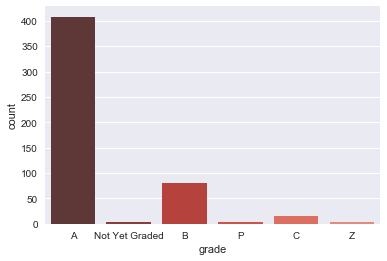

In [78]:
sns.countplot(x="grade", data=subNonaC, palette="Reds_d");
plt.show()

#### Examine boro variable

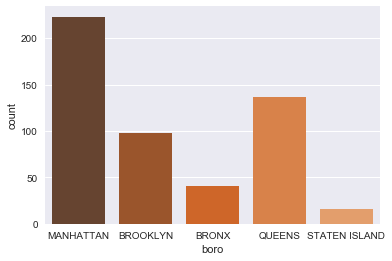

In [79]:
sns.countplot(x="boro", data=subNonaC, palette="Oranges_d");
plt.show()

#### Review inspection_type

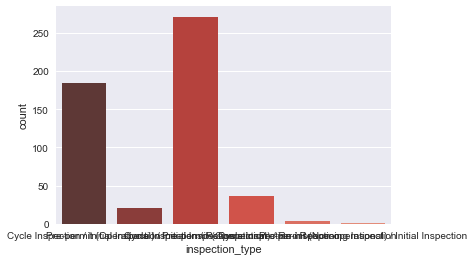

In [80]:
sns.countplot(x="inspection_type", data=subNonaC, palette="Reds_d");
plt.show()

#### Remove values from grade that will not be included in the analysis

In [81]:
gradeYes = ['A', 'B', 'C']
gradeRm = subNonaC.query('grade==@gradeYes')

In [82]:
gradeRmC = gradeRm.copy()

In [83]:
gradeRm.head()

,cuisine_description,action,boro,grade,inspection_type
0,Bagels/Pretzels,Violations were cited in the following area(s).,MANHATTAN,A,Cycle Inspection / Initial Inspection
4,Japanese,Violations were cited in the following area(s).,MANHATTAN,A,Cycle Inspection / Initial Inspection
5,American,Violations were cited in the following area(s).,MANHATTAN,B,Cycle Inspection / Re-inspection
6,Chinese,Violations were cited in the following area(s).,BRONX,A,Cycle Inspection / Initial Inspection
9,Pizza,Violations were cited in the following area(s).,MANHATTAN,A,Cycle Inspection / Re-inspection


#### Review inspection_type variable

In [84]:
i = pd.value_counts(gradeRm.inspection_type).to_frame().reset_index()
i

,index,inspection_type
0,Cycle Inspection / Re-inspection,267
1,Cycle Inspection / Initial Inspection,184
2,Pre-permit (Operational) / Re-inspection,36
3,Pre-permit (Operational) / Initial Inspection,17


#### Remove spaces

In [85]:
inspectSp = gradeRm.stack().str.replace(' ', '_').unstack()
inspectSp.head()

,cuisine_description,action,boro,grade,inspection_type
0,Bagels/Pretzels,Violations_were_cited_in_the_following_area(s).,MANHATTAN,A,Cycle_Inspection_/_Initial_Inspection
4,Japanese,Violations_were_cited_in_the_following_area(s).,MANHATTAN,A,Cycle_Inspection_/_Initial_Inspection
5,American,Violations_were_cited_in_the_following_area(s).,MANHATTAN,B,Cycle_Inspection_/_Re-inspection
6,Chinese,Violations_were_cited_in_the_following_area(s).,BRONX,A,Cycle_Inspection_/_Initial_Inspection
9,Pizza,Violations_were_cited_in_the_following_area(s).,MANHATTAN,A,Cycle_Inspection_/_Re-inspection


In [86]:
inspectSpC = inspectSp.copy()

#### Convert grade to integer

In [87]:
inspectSpC = inspectSpC.replace(['A', 'B', 'C'],
        [1, 2, 3])

#### Convert inspection_type to integer

In [88]:
df = inspectSpC.replace(['Cycle_Inspection_/_Re-inspection', 'Pre-permit_(Operational)_/_Re-inspection'],
                       [1, 2])

In [89]:
df.head()

,cuisine_description,action,boro,grade,inspection_type
0,Bagels/Pretzels,Violations_were_cited_in_the_following_area(s).,MANHATTAN,1,Cycle_Inspection_/_Initial_Inspection
4,Japanese,Violations_were_cited_in_the_following_area(s).,MANHATTAN,1,Cycle_Inspection_/_Initial_Inspection
5,American,Violations_were_cited_in_the_following_area(s).,MANHATTAN,2,1
6,Chinese,Violations_were_cited_in_the_following_area(s).,BRONX,1,Cycle_Inspection_/_Initial_Inspection
9,Pizza,Violations_were_cited_in_the_following_area(s).,MANHATTAN,1,1


In [90]:
dfC = df.copy()

In [91]:
dfC.dtypes

cuisine_description    object
action                 object
boro                   object
grade                   int64
inspection_type        object
dtype: object

### Visualize the data

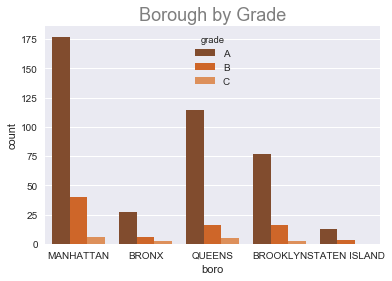

In [92]:
s=sns.countplot(x="boro", hue="grade", data=gradeRm, palette="Oranges_d").set_title('Borough by Grade', 
                                          fontsize=18,color="black",alpha=0.5) 
plt.show()

### Convert text to a single string

In [93]:
import requests
import io
text = gradeRm.cuisine_description
word_string ='\t'.join([line.strip() for line in text])


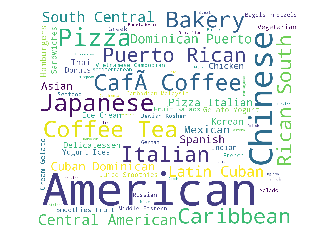

In [94]:

wordcloud = WordCloud(background_color='white',
                          width=1200,
                          height=1000
                         ).generate(word_string)
                       
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Analysis
The Mann Whitney U Test was used to determine whether the grade a resturant receives (A, B, C) and the inspecition type (Inspection/Re-inspection, Pre-permit (Operational) / Re-inspection) are statistically significant.

#### Mann Whitney U Test

In [ ]:
from scipy.stats import mannwhitneyu

m = mannwhitneyu(dfC.grade, dfC.inspection_type)
print "The U statistic is %.10f and the p-value is %.10f." % m

From this data it can be concluded, there is a statistically significant difference between the grade a restaurant receives and the inspection type (Mann Whitney U=25650.0. $P<.05$). These results should be cautiously interpreted since the P-Value is extremely small. 
